# Regression

The regression algorithm tries to get the best interpolation (fitting curve) given the initial matrix of points and the known points of the target function. This algorithm relies on the concept _norm of a vector_ and _gradient of a function_. Particularly, can take a brief look at the key steps to reach the final solution.

We can start from the formal definition of the in-sample error for the hypothesis function $h = w^Tx$:
$$
    E_{\text{IN}}(h) =  = \frac{1}{N}\sum_{i = 1}^N\,\left[ h(x_i) - y_i \right]^2
$$

And we can write it exploiting $h(x)$:
$$
    E_{\text{IN}}(w) = \frac{1}{N}\sum_{i = 1}^N\,\left[ w^Tx - y_i \right]^2
$$

Now we can make the following important observation:
$$
    \sum_{i = 1}^N\,\left[ w^Tx - y_i \right]^2 \,\,=\,\, e_1 + e_2 + \dots + e_N \,\, = \left[\sqrt{e_1 + \dots + e_N}\right]^2 = \lVert e \rVert^2
$$

So we can summarize $E_{\text{IN}}(w)$ as:
$$
    E_{\text{IN}}(w) = \frac{1}{N}\lVert w^Tx - y_i \rVert^2
$$

To minimize the errors we have to understand where the gradient function is constant, meaning that we reached the minimum value. In this case, the gradient of the function can be algebraically defined as follows:
$$
    \nabla E_\text{IN}(w) = \frac{1}{N}\left[ 2x^T \left( xw - y\right) \right]
$$

We can now work with this equation and understand how to calculate the values of $w$ such that the in-sample error is zero.
$$
    2x^T \left( xw - y\right) = 0 \\ 2x^Txw - 2x^Ty = 0 \\ 2x^Txw =  2x^Ty \\ \boxed{w = (X^T\,X)^{-1}X^T\,y}
$$

## Initial setup

After importing the vital libraries for the algorithm (<tt>numpy</tt>, <tt>pyplot</tt> and others) we start by defining the number of samples and the _spreading coefficient_ meaning that the points will be spread from 0 to the <tt>coeff</tt> value: try to change it to 1 and then to 20 to have a better understanding.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# samples 
N = 250

# spreading coefficient
coeff = 5

# generate sample data vector
X = coeff * np.random.rand(N)


After generating the input samples we try to randomly generate the __target function__ $y$. We want to insert a _noise_ into the target to make it more realistic. The noise is defined as a _Gaussian function_ enhanced (or reduced) by a coefficient, called <tt>power</tt>, resembling the power of the noise inside the data.

After that, we define the steepness ($m$) of the line and its interception with the y-axis ($q$). We are following the common line equation $y = m\,x + q$. So we can say that the _oracle_ $y$ is a combination of the vector $X$, the interception and the noise.

After defining the $X$, vector of samples and $y$, vector of the correct answer we can plot all the $(X, y)$ into the plane. By observing the output points we can properly understand the meaning of the noise power: by increasing its value the points will be more scattered meanwhile if the power is between 0 and 1, the points will be extremely near the reference line. Of course, if the power is zero the points will follow the perfect line of equation $y = m\,x + q$.

Target function:     y = 2x + 3


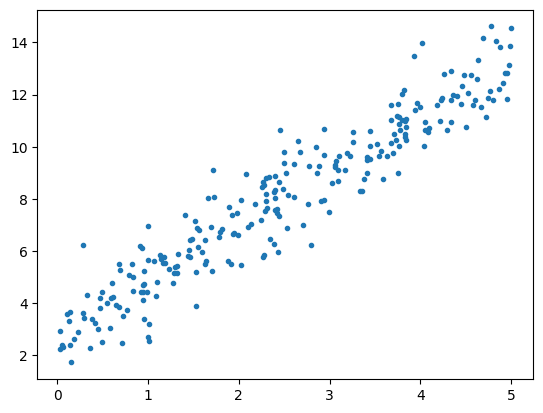

In [2]:
# noise power
power = 1

# noise as a Gaussian curved enhanced by its power coefficient
noise = power * np.random.randn(N)


# linear coefficient
m = 2

# interception
q = 3

# target function
y = m * X + q + noise
print("Target function:     y = " + str(m) + "x + " + str(q))

# plots the datapoints
plt.plot(X, y, '.')

Last but not least we will add the _bias vector_ inside the matrix. In this case, we build the bias $X_0$ as a vector of 1s and then we will stack it on the $X$ vector. The bias is not mandatory bit it is extremely useful to optimize the model. In such a way we are adding a feature to the dataset meaning that now the points are in a two-dimensional space. As we can see, now the matrix <tt>X_</tt> has $N$ elements but 2 dimensions.

In [3]:
# define the bias as a vector of 1s
X0 = np.ones(N)

# stack up the bias in the matrix
X_ = np.stack([X0, X], axis = 1)

print("X_ size:  (" + str(X_.shape[0]) + " x " + str(X_.shape[1]) + ")") 


X_ size:  (250 x 2)


## Fitting

As we saw, the fitting process is summarized in a matrix multiplication equation that is computed as follows:

$$
    w = (X^T\,X)^{-1}X^T\,y
$$

Which is essentially called _pseudo-inverse__ of $X$ times $y$. Note that the matrix multiplication is computationally complex to calculate: the average algorithm works with $O(n^3)$ which is something to consider with a large dataset, especially if there are lots of features (dimension for each datapoint).

In [4]:
# calculates the weight vector
w = np.dot(X_.T, X_) # X^T * X
w = np.linalg.inv(w) # 
w = np.dot(w , np.dot(X_.T, y)) # [(X^T * X) ^ (-1)] * (X^T * y)


We can now plot the data points and the interpolation provided by the regression algorithm calculation. We note that as the number of samples increases the two values on the weight vector $w$ are more similar to the coefficient of the line equation: $q$ and $m$. Furthermore, if we have enough samples (let's say not 10 ☺) we can increase the noise power but the interpolation won't change a lot. 

Weight vector:       [2.84303244 2.0790875 ]
                       q: 3       m: 2


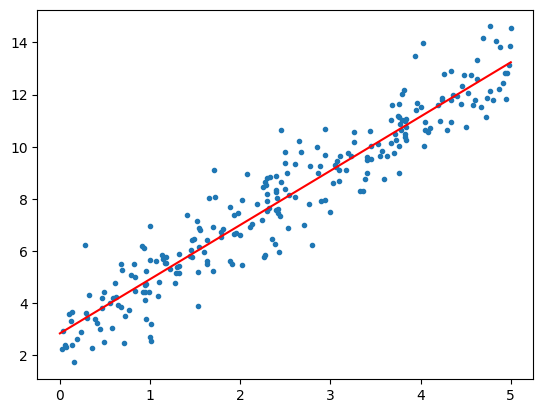

In [5]:
# plots the points
plt.plot(X, y, '.')

# plots the linear interpolation
plt.plot([0, coeff],
         [w[0], coeff * w[1] + w[0]],
         'red')


# prints the vector
print("Weight vector:       " + str(w))

# prints values for comparison
print("                       q: " + str(q) + "       m: " + str(m))

## Conclusions

With this approach, we can start with a noisy unknown target function and we can get close to it despite the noise. Moreover, we can notice that by increasing the number of points in the dataset the difference between the $w$ vector and the coefficient of the target function will get closer and closer.

In this case, we took for granted that we had a linear function and we modeled it with another linear function which is not a real situation. But we can take a look at the [polynomial regression algorithm](https://github.com/imAlessas/neural-networks/blob/main/algorithms/regression/plynomial-regression.ipynb) to better explore this scenario.
